In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
venue_df = pd.read_excel(r"C:\Users\jal32\Documents\NSS\Capstones\WhatchaWannaDo\Data\Venue_LatLongs.xlsx", index_col=0)

venue_df['geometry'] = venue_df.apply(lambda x: Point((float(x.longitude), 
                                                         float(x.latitude))), 
                                        axis=1)

In [3]:
yelp_business = pd.read_json(r"C:\Users\jal32\Documents\NSS\Capstones\WhatchaWannaDo\Data\yelp_business.json", lines=True)

In [4]:
yelp_business['geometry'] = yelp_business.apply(lambda x: Point((float(x.longitude), 
                                                         float(x.latitude))), 
                                        axis=1)

In [5]:
venue_geo = gpd.GeoDataFrame(venue_df, 
                           crs = 'EPSG:4326', 
                           geometry = venue_df['geometry'])

yelp_business_geo = gpd.GeoDataFrame(yelp_business, 
                           crs = 'EPSG:4326', 
                           geometry = yelp_business['geometry'])

In [6]:
tn_yelp_geo = yelp_business_geo.loc[yelp_business_geo.state == 'TN']

In [7]:
nash_yelp_geo = tn_yelp_geo.loc[tn_yelp_geo.city == 'Nashville']

In [8]:
filtered_tn_yelp_geo = nash_yelp_geo[nash_yelp_geo['categories'].notnull()]

In [9]:
nash_yelp_geo = filtered_tn_yelp_geo.loc[filtered_tn_yelp_geo['categories'].str.contains("restaurant|food|cocktail", case=False)]
nash_yelp_geo = nash_yelp_geo.loc[~filtered_tn_yelp_geo['categories'].str.contains("grocery|market|musicians|convenience", case=False)]
nash_yelp_geo

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,geometry
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",POINT (-86.76817 36.20810)
24,4iRzR7OaS-QaSXuvYxEGKA,Super Dog,1160 Gallatin Pike S,Nashville,TN,37115,36.248570,-86.719986,4.0,6,0,"{'RestaurantsReservations': 'False', 'Restaura...","Hot Dogs, Restaurants",None,POINT (-86.71999 36.24857)
27,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,215 1st Ave S,Nashville,TN,37201,36.159886,-86.773197,4.0,161,0,"{'RestaurantsGoodForGroups': 'True', 'HappyHou...","Restaurants, Japanese, Seafood","{'Wednesday': '16:0-22:0', 'Thursday': '16:0-2...",POINT (-86.77320 36.15989)
47,lk9IwjZXqUMqqOhM774DtQ,Caviar & Bananas,2031 Broadway,Nashville,TN,37203,36.148371,-86.798895,3.5,159,0,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","Coffee & Tea, Restaurants, Wine Bars, Bars, Ni...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",POINT (-86.79889 36.14837)
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",POINT (-86.77597 36.16265)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150097,5quqExjLtFNhykec_na8pg,Bombay Palace Restaurant,2912 W End Ave,Nashville,TN,37203,36.144508,-86.813787,4.0,476,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Food, Indian, Pakistani, Chicken Shop, Seafood...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",POINT (-86.81379 36.14451)
150147,V-snSOHDO_mrWOBtJHtg4w,Domino's Pizza,3041 Dickerson Pike,Nashville,TN,37207,36.228015,-86.758557,2.0,19,1,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Pizza, Restaurants, Sandwiches, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",POINT (-86.75856 36.22801)
150158,-KNgMklrxgRX2-T6xXeTZA,Sal's Pizza,710 Stewarts Ferry Pike,Nashville,TN,37214,36.153117,-86.626122,3.5,150,1,"{'RestaurantsAttire': 'u'casual'', 'OutdoorSea...","Italian, Salad, Restaurants, Pizza, Delis","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",POINT (-86.62612 36.15312)
150277,n6W7Dtz5Xz4glh2bkEFX1Q,San Luis Taqueria,"1501 Lebanon Pike, Ste 2",Nashville,TN,37210,36.153582,-86.721293,4.0,6,1,"{'Alcohol': 'u'none'', 'WiFi': 'u'free'', 'Res...","Restaurants, Mexican","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ...",POINT (-86.72129 36.15358)


In [10]:
# nash_yelp_geo.loc[nash_yelp_geo['longitude'].str.contains("-86.804558", case=False)]

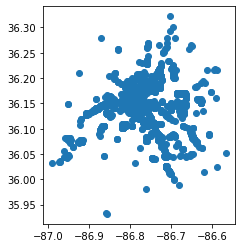

In [11]:
nash_yelp_geo.plot();

In [12]:
# venue_geo.plot();

venue_geo

,latitude,longitude,postal_code,geometry
venue,,,,
Ryman Auditorium,36.161247,-86.778471,37219,POINT (-86.77847 36.16125)
Marathon Music Works,36.165150,-86.794296,37203,POINT (-86.79430 36.16515)
The Basement,36.137220,-86.778590,37203,POINT (-86.77859 36.13722)
The Basement East,36.175672,-86.755583,37206,POINT (-86.75558 36.17567)
Mercy Lounge,36.153215,-86.780605,37203,POINT (-86.78061 36.15322)
The 5 Spot,36.180017,-86.749982,37206,POINT (-86.74998 36.18002)
The End,36.151420,-86.803875,37203,POINT (-86.80387 36.15142)
Plaza Mariachi,36.084923,-86.730314,37211,POINT (-86.73031 36.08492)


In [13]:
nash_yelp_geo.geometry.centroid

C:\Users\jal32\AppData\Local\Temp\ipykernel_24984\2953407967.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nash_yelp_geo.geometry.centroid


9         POINT (-86.76817 36.20810)
24        POINT (-86.71999 36.24857)
27        POINT (-86.77320 36.15989)
47        POINT (-86.79889 36.14837)
89        POINT (-86.77597 36.16265)
                     ...            
150097    POINT (-86.81379 36.14451)
150147    POINT (-86.75856 36.22801)
150158    POINT (-86.62612 36.15312)
150277    POINT (-86.72129 36.15358)
150322    POINT (-86.77631 36.16388)
Length: 2833, dtype: geometry

In [14]:
center = nash_yelp_geo.geometry.centroid[150322]
print(center)

C:\Users\jal32\AppData\Local\Temp\ipykernel_24984\3847661532.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = nash_yelp_geo.geometry.centroid[150322]


POINT (-86.77631100000001 36.1638754)


In [15]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.1638754, -86.776311]


In [16]:
#create our map of Nashville Zip Code 37207 and show it
map_nash_yelp = folium.Map(location =  area_center, zoom_start = 12)
map_nash_yelp

In [17]:
import geopy.distance
dist_from_venue = []
for i, row in venue_df.iterrows():
    coords1 = (float(row['latitude']),float(row['longitude']))
    
    for j, row2 in nash_yelp_geo.iterrows():
        coords2 = (float(row2['latitude']),float(row2['longitude']))
        nash_yelp_geo.at[j, i] = geopy.distance.geodesic(coords1, coords2).miles
#         dist_from_venue.append(geopy.distance.geodesic(coords1, coords2).miles)
    
# nash_yelp_geo['dist_from_venue'] = dist_from_venue


In [18]:
venue_dist_df = pd.melt(nash_yelp_geo, id_vars=nash_yelp_geo.columns[:-7],
        var_name='venue', value_name='distance')

narrow_dist_df = venue_dist_df.loc[venue_dist_df['distance'] < .5]

narrow_dist_df


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,geometry,Ryman Auditorium,venue,distance
55,lsGZzXIJbjrWtcFGLAW5sw,AM@FM,900 Rosa L Parks Blvd,Nashville,TN,37243,36.169304,-86.788028,4.0,41,0,"{'BusinessParking': '{'garage': False, 'street...","American (New), Beer, Wine & Spirits, Food, Sa...","{'Monday': '11:0-15:0', 'Tuesday': '11:0-15:0'...",POINT (-86.78803 36.16930),0.770773,Marathon Music Works,0.452580
89,6USj3cqHAf2HkjBNomafRA,Bowl & Roll,900 Rosa L Parks Blvd,Nashville,TN,37208,36.169304,-86.788028,4.0,38,1,"{'BikeParking': 'True', 'RestaurantsPriceRange...","Asian Fusion, Restaurants, Specialty Food, Food","{'Monday': '10:30-16:30', 'Tuesday': '10:30-16...",POINT (-86.78803 36.16930),0.770773,Marathon Music Works,0.452580
163,qp7cJWwx5-j45fLGLYsn_Q,Pokeworks,416 11th Ave N,Nashville,TN,37203,36.163299,-86.791044,4.5,6,1,"{'BikeParking': 'False', 'HasTV': 'False', 'Wh...","Salad, Sushi Bars, Restaurants, Food, Poke","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",POINT (-86.79104 36.16330),0.717070,Marathon Music Works,0.222127
202,ybKS2qB9MIST0Hl_7ZEDkQ,Speckled Hen,900 Rosa L Parks Blvd,Nashville,TN,37208,36.169304,-86.788028,4.0,5,0,"{'Alcohol': 'u'none'', 'BusinessAcceptsCreditC...","Restaurants, Breakfast & Brunch",{'Sunday': '10:0-14:0'},POINT (-86.78803 36.16930),0.770773,Marathon Music Works,0.452580
224,RWY-NtTfOdphkgcS9RL5ZQ,Gyros & Kebab,1414 Charlotte Ave,Nashville,TN,37203,36.160358,-86.795296,4.5,11,0,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Food, Imported Food, Specialty Food, Ethnic Food",None,POINT (-86.79530 36.16036),0.942682,Marathon Music Works,0.335076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19324,2J_aeR1qu6s01mwisF0YrQ,Taqueria Hidalgo,3955 Nolensville Pk,Nashville,TN,37211,36.084325,-86.730353,3.5,14,1,"{'GoodForKids': 'True', 'RestaurantsReservatio...","Latin American, Restaurants, Salvadoran, Tacos...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",POINT (-86.73035 36.08432),5.947551,Plaza Mariachi,0.041290
19391,TkJnYt23cuH8L3ZeQRtivg,Madera Cafe,3961 Nolensville Pike,Nashville,TN,37211,36.084403,-86.729955,4.0,46,0,"{'BusinessAcceptsBitcoin': 'False', 'BusinessP...","Sandwiches, Breakfast & Brunch, Restaurants, M...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ...",POINT (-86.72996 36.08440),5.952902,Plaza Mariachi,0.041119
19428,8alwxME7voyqwwRaqtwB9g,Juicy Seafood,3949 Nolensville Pike,Nashville,TN,37211,36.084850,-86.730605,3.5,21,1,"{'BusinessParking': '{'garage': False, 'street...","Seafood, Restaurants, Gluten-Free, Cajun/Creole","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...",POINT (-86.73060 36.08485),5.908871,Plaza Mariachi,0.017061
19668,dAKoLEVOT0gAU3ot8sFB_g,Arby's,4097 Nolensville Pike,Nashville,TN,37211,36.080448,-86.727181,3.0,16,1,"{'RestaurantsPriceRange2': '1', 'Caters': 'Fal...","Restaurants, Burgers, Sandwiches, Fast Food",None,POINT (-86.72718 36.08045),6.266357,Plaza Mariachi,0.354868


In [19]:
map_nash_yelp = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(map_nash_yelp)

# folium.GeoJson(polygon37207).add_to(cluster_map_37207)

# inside the loop add each marker to the cluster
for row_index, row_values in narrow_dist_df.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['name'])
    icon=folium.Icon(color="red",icon="star", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
# cluster_map_37207.save('../maps/cluster37207.html')

map_nash_yelp

In [20]:
narrow_dist_df.to_csv(r"C:\Users\jal32\Documents\NSS\Capstones\WhatchaWannaDo\Data\venue-distance.csv")
narrow_dist_df.to_csv(r"C:\Users\jal32\Documents\NSS\Capstones\venue-distance.csv")

venue_geo.to_csv(r"C:\Users\jal32\Documents\NSS\Capstones\WhatchaWannaDo\Data\venue-geo.csv")
venue_geo.to_csv(r"C:\Users\jal32\Documents\NSS\Capstones\venue-geo.csv")

In [21]:
# test = narrow_dist_df.copy()
# test_0 = narrow_dist_df.copy()

# test

In [22]:
# e_dict = {"type_est":'venue',"name":"The End","geometry":venue_geo.loc['The End', "geometry"], 
#              "postal_code":venue_geo.loc['The End', "postal_code"],"latitude":venue_geo.loc['The End', "latitude"],
#              "longitude":venue_geo.loc['The End', "longitude"], "number":10}
             
# r_dict   = {"type_est":'venue',"name":"Ryman Auditorium","geometry":venue_geo.loc['Ryman Auditorium', "geometry"], 
#              "postal_code":venue_geo.loc['Ryman Auditorium', "postal_code"],"latitude":venue_geo.loc['Ryman Auditorium', "latitude"],
#              "longitude":venue_geo.loc['Ryman Auditorium', "longitude"], "number":10}
             
# m_dict = {"type_est":'venue',"name":"Marathon Music Works","geometry":venue_geo.loc['Marathon Music Works', "geometry"], 
#              "postal_code":venue_geo.loc['Marathon Music Works', "postal_code"],"latitude":venue_geo.loc['Marathon Music Works', "latitude"],
#              "longitude":venue_geo.loc['Marathon Music Works', "longitude"], "number":10}
             
# l_dict = {"type_est":'venue',"name":"Mercy Lounge","geometry":venue_geo.loc['Mercy Lounge', "geometry"], 
#              "postal_code":venue_geo.loc['Mercy Lounge', "postal_code"],"latitude":venue_geo.loc['Mercy Lounge', "latitude"],
#              "longitude":venue_geo.loc['Mercy Lounge', "longitude"], "number":10}
             
# b_dict = {"type_est":'venue',"name":"The Basement","geometry":venue_geo.loc['The Basement', "geometry"], 
#              "postal_code":venue_geo.loc['The Basement', "postal_code"],"latitude":venue_geo.loc['The Basement', "latitude"],
#              "longitude":venue_geo.loc['The Basement', "longitude"], "number":10}
             
# be_dict = {"type_est":'venue',"name":"The Basement East","geometry":venue_geo.loc['The Basement East', "geometry"], 
#              "postal_code":venue_geo.loc['The Basement East', "postal_code"],"latitude":venue_geo.loc['The Basement East', "latitude"],
#              "longitude":venue_geo.loc['The Basement East', "longitude"], "number":10}
            
# s_dict = {"type_est":'venue',"name":"The 5 Spot","geometry":venue_geo.loc['The 5 Spot', "geometry"], 
#              "postal_code":venue_geo.loc['The 5 Spot', "postal_code"],"latitude":venue_geo.loc['The 5 Spot', "latitude"],
#              "longitude":venue_geo.loc['The 5 Spot', "longitude"], "number":10}
# test_dict

# test['type_est'] = "food"

# test['number'] = 0

In [23]:
# test2 = test.append([e_dict, r_dict, m_dict, l_dict, b_dict, be_dict, s_dict], ignore_index=False)
# test2

In [24]:
# narrow_dist_df = test2


In [25]:
# narrow_dist_df